# Linear Regression Project

We are going to work with the **"Medical Costs"** dataset.

The objective of this project is to create a model that can **predict how much an insurance company should charge a customer for health insurance**, given their risk factors (whether the person is a smoker, region where they are, age, number of children, etc.).

This problem can be solved by building a **regression model** that takes as input variables such as age, sex, BMI (Body Mass Index), smoker and region, and predicts the medical cost as output.

# Getting the data



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploratory Data Analysis (EDA)

The goal of performing Exploratory Data Analysis (EDA) in a machine learning model is to gain a deeper understanding of the data before applying any model. This is a critical step that allows you to identify patterns, spot errors, and form hypotheses about relationships between variables, all of which help ensure the data is properly prepared for modeling.

In [5]:
print("Number of rows and columns in the dataset:")
print(df.shape)

Number of rows and columns in the dataset:
(1338, 7)


In [6]:
print("Dataset summary")
print(df.info())

Dataset summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [7]:
# Count missing values
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [8]:
df.nunique() # shows number of unique values in each column

,0
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [9]:
print("Descriptive statistics for numerical variables")
df.describe()

Descriptive statistics for numerical variables


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
print("Descriptive statistics for categorical variables")
df.describe(include=['object', 'category'])

Descriptive statistics for categorical variables


,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


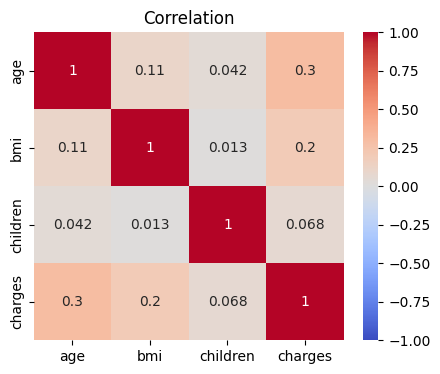

In [11]:
# Pick only the numerical features
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Create a correlation heatmap using just the numerical features
plt.figure(figsize=(5, 4))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation')
plt.show()

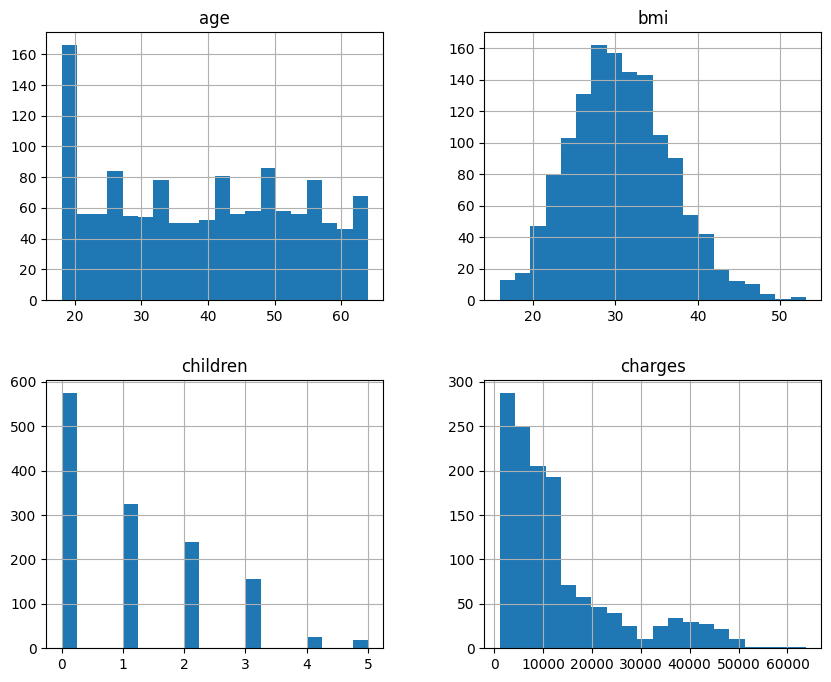

In [12]:
# Histogram/Barplots for numerical variables
df_numeric.hist(bins=20, figsize=(10, 8))
plt.show()

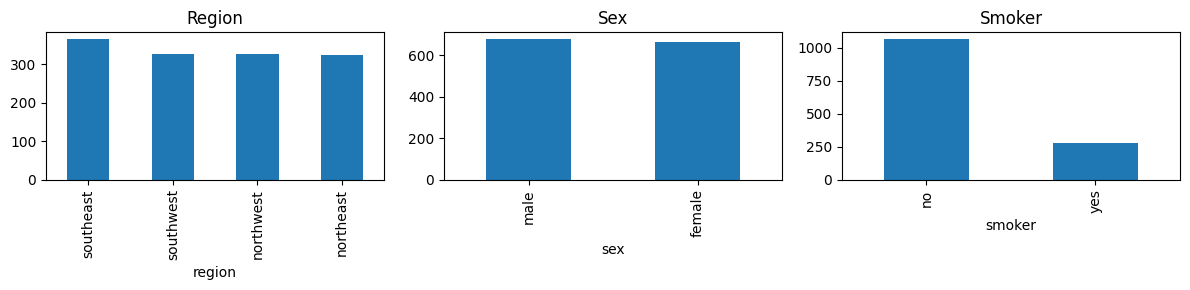

In [13]:
# Create a plot with three subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(12, 3))  # 1 row 3 columns for the plot

df['region'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Region')

df['sex'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Sex')

df['smoker'].value_counts().plot(kind='bar', ax=axes[2])
axes[2].set_title('Smoker')

plt.tight_layout()
plt.show()

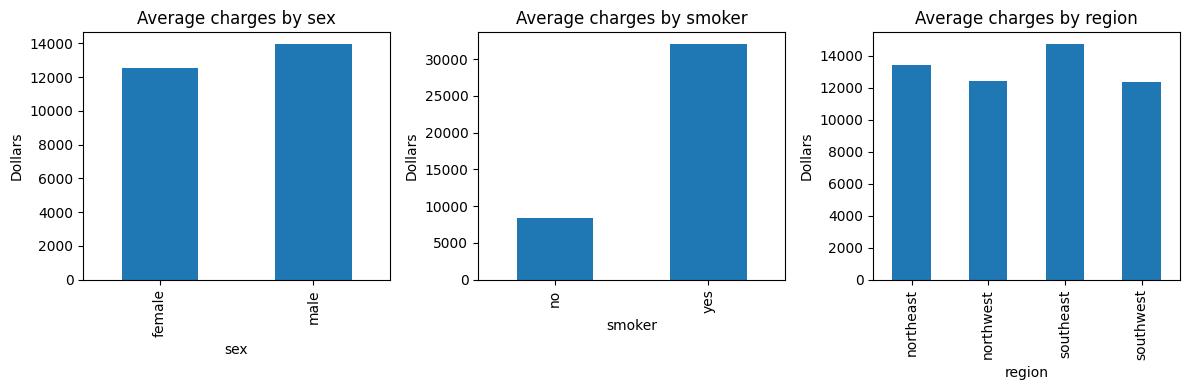

In [14]:
# Let's explore the medical cost by categorical variable
categorical_columns = ['sex', 'smoker', 'region']

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, column in enumerate(categorical_columns):
    mean_costs = df.groupby(column)['charges'].mean()
    mean_costs.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Average charges by {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Dollars')

plt.tight_layout()
plt.show()

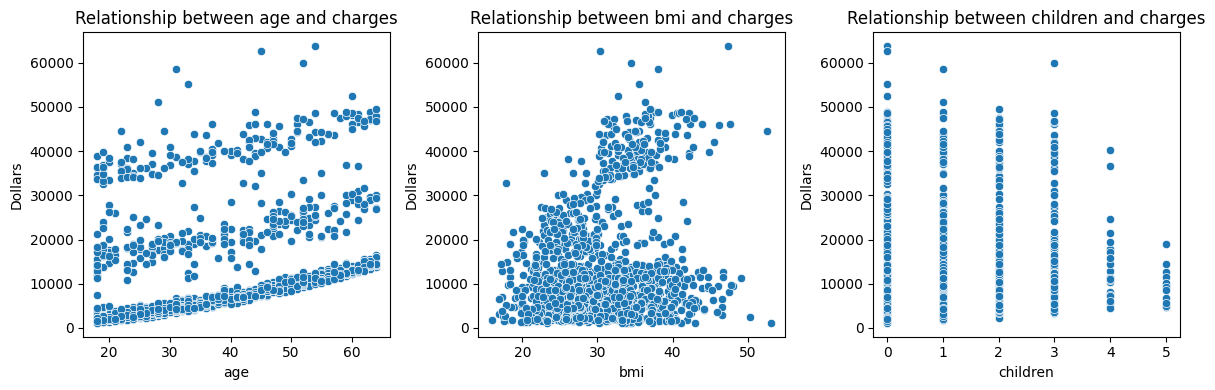

In [15]:
# Numerical variables
numerical_columns = ['age', 'bmi', 'children']

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, column in enumerate(numerical_columns):
    sns.scatterplot(x=df[column], y=df['charges'], ax=axes[i])
    axes[i].set_title(f'Relationship between {column} and charges')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Dollars')

plt.tight_layout()
plt.show()

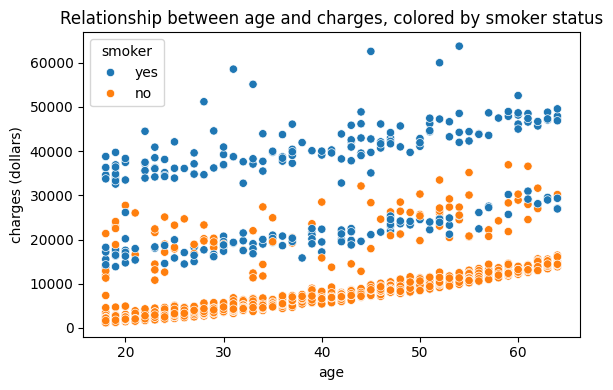

In [16]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['age'], y=df['charges'], hue=df['smoker'])

plt.title('Relationship between age and charges, colored by smoker status')
plt.xlabel('age')
plt.ylabel('charges (dollars)')

plt.tight_layout()
plt.show()

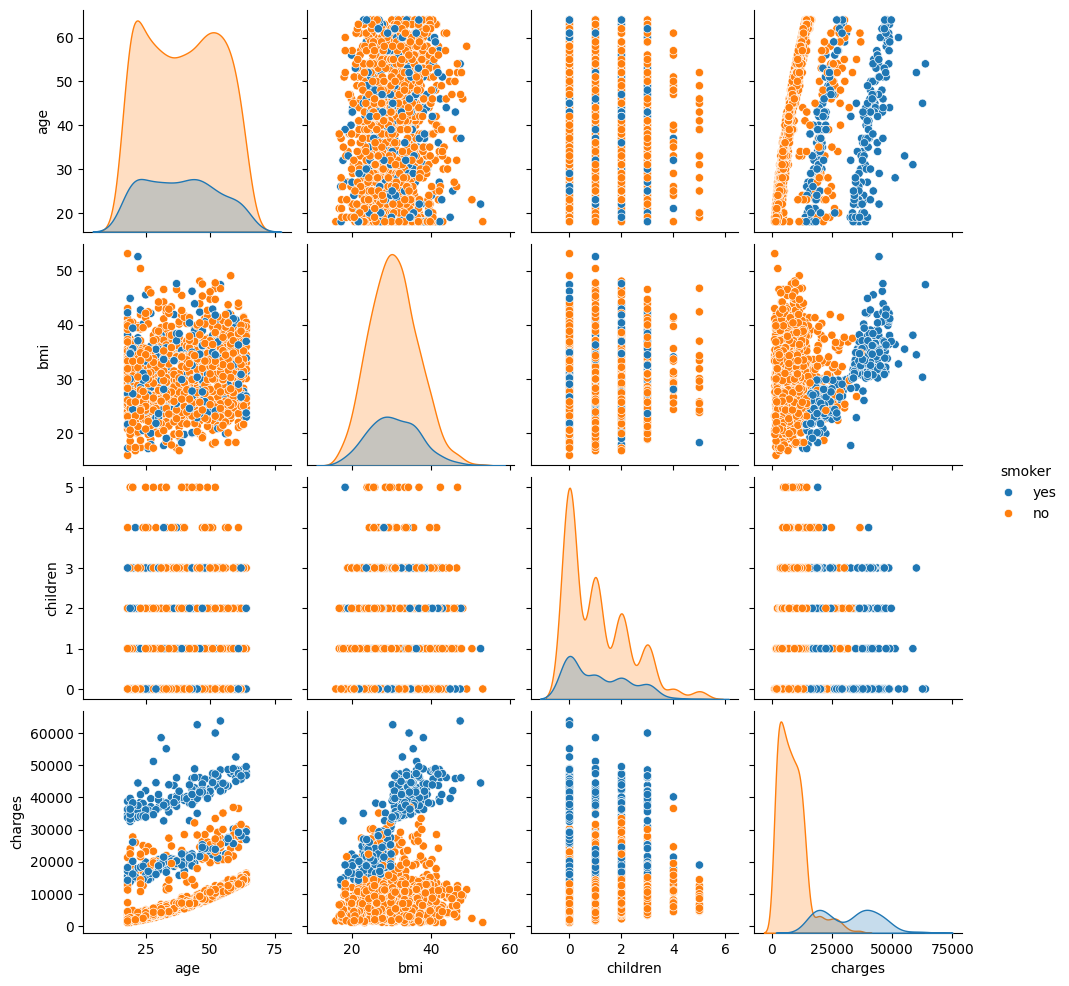

In [17]:
# Pairplot
sns.pairplot(df, hue='smoker')
plt.show()

# What other EDA would you do on this dataset? 🫵

# ⚠️ Splitting Data into Training and Test Sets ⚠️

It is **crucial** to split the data into training and test sets **BEFORE** performing any feature engineering or training the model.

If you transform the data before splitting, you risk allowing information from the test set to leak into the training data (data leakage). This leads to overfitting, where the model appears to perform very well but doesn't truly reflect how it will perform on new or unseen data (can't generalize).




In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Define your features (X) and your target variable (y)
X = df.drop(columns=['charges'])  # Here we get rid off the charges because it's the target variable
y = df['charges']  # This is our target variable

In [20]:
# Divide the dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train.head()

,age,sex,bmi,children,smoker,region
560,46,female,19.95,2,no,northwest
1285,47,female,24.32,0,no,northeast
1142,52,female,24.86,0,no,southeast
969,39,female,34.32,5,no,southeast
486,54,female,21.47,3,no,northwest


In [22]:
y_train.head()

,charges
560,9193.83850
1285,8534.67180
1142,27117.99378
969,8596.82780
486,12475.35130


In [23]:
X_test.head()

,age,sex,bmi,children,smoker,region
764,45,female,25.175,2,no,northeast
887,36,female,30.020,0,no,northwest
890,64,female,26.885,0,yes,northwest
1293,46,male,25.745,3,no,northwest
259,19,male,31.920,0,yes,northwest


In [24]:
y_test.head()

,charges
764,9095.06825
887,5272.17580
890,29330.98315
1293,9301.89355
259,33750.29180


In [25]:
print(f"Train set size: {X_train.shape}. Number of labels in the trian set: {y_train.shape}")
print(f"Test set size: {X_test.shape}. Number of labels in the test set: {y_test.shape}")

Train set size: (1070, 6). Number of labels in the trian set: (1070,)
Test set size: (268, 6). Number of labels in the test set: (268,)


# Feature Engineering

- Feature engineering is the process of turning raw data into features or variables that a Machine Learning model can use effectively to make predictions.

- These features are the values the model uses as inputs, so creating quality features can significantly improve the model's performance.



  > - For **categorical features**, it is **mandatory** to transform them before using them in the model. This is because Machine Learning models cannot work with text or categories directly, so they must be converted into a numerical form (such as with one-hot encoding or ordinal encoding).


  > - For **numerical features**, transformation is not mandatory, but it is recommended. Normalizing or standardizing numerical features can improve the model's accuracy and stability, especially when the variables have very different magnitudes.


> - Beyond numerical and categorical features, feature engineering can involve:
    - Feature extraction: Creating new features from existing ones
    - Processing textual data: Converting text into word embeddings (TFIDF, GloVe, Word2Vec, BERT) or n-grams
    - Extracting relevant details: For example, if you have a date, extracting holidays
    - Dimensionality reduction techniques like PCA or t-SNE to reduce feature space and highlight important features


In [26]:
# Define numerical and categorical features
categorical_columns = ['sex', 'smoker', 'region']
numerical_columns = ['age', 'bmi', 'children']

In [27]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [28]:
# Create a preprocessor that applies both one-hot encoding for categorical variables and scaling for numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Standarize numerical features
        ('cat', OneHotEncoder(), categorical_columns)  # One-Hot encoding for categorical features
    ])


**Note:**
From now on, in the code, if you see the following methods:

- `.fit()`: Some learning is happening. It should **ONLY** be applied to the train dataset.

- `.transform()`: It applies what was learned during the learning phase. It can be used on the train and the test dataset.

- `.fit_transform()`: It learns and applies the learning at the same time. It should **ONLY** be applied to the train dataset.


In [29]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [30]:
X_train_processed

array([[ 0.47222651, -1.75652513,  0.73433626, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.54331294, -1.03308239, -0.91119211, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.8987451 , -0.94368672, -0.91119211, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.3252637 , -0.89153925, -0.91119211, ...,  0.        ,
         0.        ,  0.        ],
       [-0.16755139,  2.82086429,  0.73433626, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.1120044 , -0.10932713, -0.91119211, ...,  0.        ,
         0.        ,  1.        ]])

In [31]:
# Some code so it's easier to visualize

# The get_feature_names_out method generates the names of the new columns created by OneHotEncoder for the categorical columns.
name_categorical_coumns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
name_all_columns = list(numerical_columns) + list(name_categorical_coumns)

X_train_processed_df = pd.DataFrame(X_train_processed, columns=name_all_columns)
X_train_processed_df.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.472227,-1.756525,0.734336,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.543313,-1.033082,-0.911192,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.898745,-0.943687,-0.911192,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.025379,0.622393,3.202629,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.040918,-1.504893,1.557100,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [32]:
X_test_processed_df = pd.DataFrame(X_test_processed, columns=name_all_columns)
X_test_processed_df.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.401140,-0.891539,0.734336,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-0.238638,-0.089461,-0.911192,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.751782,-0.608453,-0.911192,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.472227,-0.797177,1.557100,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-1.447107,0.225079,-0.911192,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


# Model: Linear Regression

In machine learning, it's common to train several models that are suitable for the task at hand (in this case, regression) and then choose the best model based on its performance. However, to start and get familiar with the process, we will first train a linear regression model. This will allow us to better understand how this type of model works before exploring more advanced ones.

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model = LinearRegression()
model.fit(X_train_processed_df, y_train)

LinearRegression()

# Evaluate the model

To evaluate the model's performance, we first need to use it to make **predictions** on the test dataset. Then, we'll compare these predictions with the actual values from our test set to measure how well the model is working. This will give us a clear idea of its ability to **generalize** to new data.

In [35]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
y_pred = model.predict(X_test_processed_df)

In [37]:
y_pred[0:5]

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656])

In [38]:
y_test.values[0:5]

array([ 9095.06825,  5272.1758 , 29330.98315,  9301.89355, 33750.2918 ])

### Performance metrics

In [39]:
# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

RMSE: 5796.284659276274


### RMSE (Root Mean Squared Error): 5796.28
- **Interpretation**: RMSE is a measure of the average magnitude of error between the model's predictions and the actual values. In this case, an RMSE of 5796.28 means that, on average, the model is off by about $5796.28 when predicting medical costs.


In [40]:
df['charges'].describe()

,charges
count,1338.000000
mean,13270.422265
std,12110.011237
min,1121.873900
25%,4740.287150
50%,9382.033000
75%,16639.912515
max,63770.428010



- **How good is it?**: The interpretation of RMSE depends on the range of cost values (in dollars) in your data. If the medical costs have a wide range, an RMSE of 5796.28 might be acceptable. If the cost values are in a smaller range, this RMSE could be considered high. Comparing this value to the average or median of the medical costs can help put it into context.


In [41]:
# R² (Determination coefficient)
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

R²: 0.7835929767120722


### R² (Coefficient of Determination): 0.78
- **Interpretation**: R² indicates the proportion of the variance in the data that is explained by the model. An R² of 0.78 means that 78% of the variation in medical costs can be explained by the variables in the model.

- **How good is it?**: An R² close to 1 indicates that the model has a very good fit. In your case, a value of 0.78 is a good sign that the model is capturing a significant amount of the variability in the data, though there is still 22% of the variation that the model does not explain.


# Interpreting the model

In [42]:
# Coefficients
coefs = model.coef_

In [43]:
for name, coef in zip(name_all_columns, coefs):
    print(f"Feature: {name:<20} Coefficient: {coef:.4f}")

Feature: age                  Coefficient: 3614.9754
Feature: bmi                  Coefficient: 2036.2281
Feature: children             Coefficient: 516.8902
Feature: sex_female           Coefficient: 9.2958
Feature: sex_male             Coefficient: -9.2958
Feature: smoker_no            Coefficient: -11825.5644
Feature: smoker_yes           Coefficient: 11825.5644
Feature: region_northeast     Coefficient: 459.5852
Feature: region_northwest     Coefficient: 88.9079
Feature: region_southeast     Coefficient: -198.2791
Feature: region_southwest     Coefficient: -350.2141


In [44]:
yintercept = model.intercept_
print(f"{yintercept:.2f}")

20311.93


In [45]:
std = df.select_dtypes(include=['number']).std().to_frame(name='Standard Deviation').rename_axis('Feature').reset_index()
std

,Feature,Standard Deviation
0,age,14.049960
1,bmi,6.098187
2,children,1.205493
3,charges,12110.011237


In [46]:
# Some code to obtain the unstandarized coefficients

std_numerical = std[std['Feature'].isin(numerical_columns)]['Standard Deviation'].values

# Unstandarized coefficients for numerical columns
coefs_unstandarized_numerical = coefs[:len(numerical_columns)] / std_numerical

# Coefficients for categorical variables (no need to unstandarized)
coefs_cat = coefs[len(numerical_columns):]

# Put together
coefs_desst = np.concatenate([coefs_unstandarized_numerical, coefs_cat])

# Adjust the y-intercept so it's also unstandarized
numerical_means = preprocessor.named_transformers_['num'].mean_
yintercept_unst = yintercept - np.sum(coefs[:len(numerical_columns)] * numerical_means / std_numerical)

# Create final table
final_table = pd.DataFrame({
    'Feature': name_all_columns,
    'Standard Deviation': list(std_numerical) + ['N/A'] * len(name_categorical_coumns),
    'Original Coefficients': coefs,
    'Unstandarized Coefficients': coefs_desst
})

# Add y-intercept
table_yintercept = pd.DataFrame({
    'Feature': ['y_intercpt'],
    'Standard Deviation': ['N/A'],
    'Original Coefficients': [yintercept],
    'Unstandarized Coefficients': [yintercept_unst]
})

# Put the two dfs together
final_table = pd.concat([final_table, table_yintercept], ignore_index=True)

In [47]:
final_table.sort_values('Unstandarized Coefficients', key=abs, ascending=False)

,Feature,Standard Deviation,Original Coefficients,Unstandarized Coefficients
6,smoker_yes,N/A,11825.564428,11825.564428
5,smoker_no,N/A,-11825.564428,-11825.564428
11,y_intercpt,N/A,20311.928139,-493.605637
7,region_northeast,N/A,459.585244,459.585244
2,children,1.205493,516.890247,428.779229
10,region_southwest,N/A,-350.214110,-350.214110
1,bmi,6.098187,2036.228123,333.907135
0,age,14.04996,3614.975415,257.294349
9,region_southeast,N/A,-198.279052,-198.279052
8,region_northwest,N/A,88.907918,88.907918


# Interpretation of the coefficients and the y-intercept

- **y-intercept**:

The expected medical charges are approximately $20,311 when all the input features (such as age, BMI, etc.) are at their mean values in the dataset.

- **age**: 257.29

As people get older, their medical costs are expected to increase by about $257 per year. This indicates a strong relationship between age and healthcare expenses, as older individuals tend to require more medical care.



- **bmi**: 333.91

A higher BMI is associated with increased medical costs, with each additional point of BMI leading to approximately $334 in extra healthcare expenses. This suggests that higher BMI may correlate with greater health risks or conditions requiring medical intervention.



- **children**: 428.78

Families with more children are likely to incur higher medical costs, with an additional child increasing expenses by about $429. This reflects the extra healthcare needs for children, including regular check-ups, vaccinations, and potential treatments.



- **sex**: 9.30 (female) / -9.30 (male)

Gender (in this dataset) has a minimal impact on medical costs, with females slightly more likely to have higher expenses by about $9 compared to males, but this difference is not practically significant.



- **smoker**: -11825.56 (no) / -11825.56 (yes)

Smoking has a major impact on healthcare costs, with smokers expected to incur around $11,826 more in medical expenses than non-smokers. This highlights the significant health risks associated with smoking, such as lung disease, heart conditions, and cancer, which lead to higher medical interventions and costs.



- **region**: 459.59 (northeast) / 88.91 (northwest) / -198.28 (southeast) / -350.21 (southwest)

Geographic location has a moderate effect on medical costs. People in the Northeast generally face higher medical expenses compared to those in other regions, while those in the Southwest and Southeast tend to have lower costs. This could reflect regional differences in healthcare access, cost of living, or prevalent health conditions.





# Recommendations and Conclusions

It is essential for data scientists to interpret their model and provide business recommendations because the ultimate goal of the analysis is not just to develop accurate models, but to generate **real value** for the organization or company. Machine learning models and statistical analyses alone are not useful if stakeholders do not understand how they can be applied to decision-making. Data scientists must be able to translate technical results (such as coefficients, performance metrics, etc.) into actionable business recommendations.

---

Given that the RMSE is a bit high and the R² is only 0.78, the model is not perfect, but it already offers clear insights into which factors are driving medical costs. However, to make more robust decisions, it is important to improve the model by using techniques such as:
- Testing more complex models.
- Adding interactions or new features.
- Performing cross-validation and hyperparameter tuning.


> Even though the model has its limitations, actions like smoking cessation programs, weight control initiatives, and preventive care for older adults could still positively impact medical costs. The model points to smoking and BMI as major factors driving costs, making them clear targets for wellness campaigns and interventions.



# Deployment (optional)

The type of deployment for a machine learning model depends on the use case, the available infrastructure, and the business needs.


In [48]:
def predict_patient_costs(patient, model, preprocessor):
    """
    Function to predict the medical costs of a new patient.

    Parameters:
    - patient: Dictionary with the characteristics of the new patient.
    - model: Trained model used to make the prediction.
    - preprocessor: Preprocessor used to transform the data before training the model.

    Returns:
    - Prediction of the patient's medical costs.
    """
    # Create a DataFrame with the new patient's data
    patient_df = pd.DataFrame([patient])

    # Apply preprocessing (transform the new patient) to match the training data
    patient_processed = preprocessor.transform(patient_df)

    # Make the prediction using the trained model
    prediction = model.predict(patient_processed)

    return prediction[0]

In [49]:
# Pretend we get a new client
new_client = {
    'age': 45,
    'sex': 'female',
    'bmi': 27.5,
    'children': 2,
    'smoker': 'no',
    'region': 'northeast'
}

In [50]:
prediction = predict_patient_costs(new_client, model, preprocessor)

print(f'Medical charges for the new client: ${prediction:.2f}')

Medical charges for the new client: $9753.29


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# More inspiration...

https://www.kaggle.com/datasets/mirichoi0218/insurance/data